In [1]:
import os
import sys
import glob
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# IMPORTANT - import from own scripts in different directories
# ############################################################
#h5data_process    = os.path.join("C:\\", "Users", "u55266hs", "OneDrive - The University of Manchester", "coding", "visualize_qv3d", "h5data_process")
h5data_process = '/home/novac/Desktop/Projects/visualize_qv3d/h5data_process'
sys.path.append(h5data_process) # add the directory path into the memory where includes particles.py
from from_input_deck import extract_value_from_input_deck

fontsize = 12
fontsize14 = 14

# in linux
# ########
simulation_path = "/home/novac/Desktop/Projects/autorun_qv3d/simulation"

# in windows
# ##########
#simulation_path = os.path.join("C:\\", "Users", "u55266hs", "OneDrive - The University of Manchester", "coding", "SCARF", "density-1e15")

In [5]:
# Find all .pkl files
# ####################
pkl_files = glob.glob(f"{simulation_path}/*.pkl")

import glob
import re

# Extract the number just before .pkl
def extract_number(filename):
    match = re.search(r'(\d+)\.pkl$', filename)
    return int(match.group(1)) if match else float('inf')  # Default to high value if no match

pkl_files = sorted(glob.glob(f"{simulation_path}/*.pkl"), key=extract_number)

pkl_files = pkl_files[1:] # remove the first file as it is at time zero

# Load the pickle file
# ####################
pklFile = pkl_files[1]
print(pklFile)
with open(pklFile, "rb") as file:
    data = pickle.load(file)

# print the keys
# ##############
for key in data.keys():
    print(key)

# Unpack dictionary keys into variables
# #####################################
if isinstance(data, dict):
    criticalEnergy = data.get("criticalEnergy")
    Nphotons_Energy = data.get("Nphoton_Energy")
    Nphoton_Theta  = data.get("Nphoton_Theta")
    Nphoton_Phi    = data.get("Nphoton_Phi")
    Energy         = data.get("Energy")
    Theta          = data.get("Theta")
    Phi            = data.get("Phi")
    phase          = data.get("phase")


/home/novac/Desktop/Projects/autorun_qv3d/simulation/v3d_synchrotron_00003.pkl
criticalEnergy
Nphoton_Energy
Nphoton_Theta
Nphoton_Phi
Energy
Theta
Phi
phase


In [6]:
# ###############################################################################
def integrate_array_with_respect_to_array(array1, array2, start_index, end_index):
    """
    Integrate array1 with respect to array2 between two specified indices using Simpson's rule.

    Parameters:
        array1 (array-like): Array of values to integrate.
        array2 (array-like): Array of values with respect to which integration is performed.
        start_index (int): Start index for integration.
        end_index (int): End index for integration.

    Returns:
        float: Integral of array1 with respect to array2 between the specified indices.
    """
    # Slice the arrays between start and end indices
    array1_slice = array1[start_index:end_index+1]
    array2_slice = array2[start_index:end_index+1]

    # Perform numerical integration using Simpson's rule
    integral = simps(array1_slice, array2_slice)

    return integral

# ############################################
def plot_spectrum_regions(Nphotons_Energy, Energy):
    x_initenergy = 124 #eV
    uv_initenergy = 3.1 #eV

    # Calculate all photons
    start_index = 0            # Start index for integration
    end_index = len(Energy)    # End index for integration
    all_photons = integrate_array_with_respect_to_array(Nphotons_Energy, Energy, start_index, end_index)
    #print('ALL photons number: ', (all_photons))
    #print('ALL photons number: ', "{0:.1E}".format(all_photons))

    for i in range(end_index):
        if Energy[i] >= uv_initenergy:
            uv_index = i
            break
    for i in range(end_index):
        if Energy[i] >= x_initenergy:
            x_index = i
            break
    low_photons = integrate_array_with_respect_to_array(Nphotons_Energy, Energy, start_index, uv_index)
    #print('Low energy photons number (', "{0:.1f}".format(Energy[start_index]), '-', "{0:.1f}".format(Energy[uv_index-1]), ' eV): ', "{0:.1E}".format(low_photons))

    uv_photons = integrate_array_with_respect_to_array(Nphotons_Energy, Energy, uv_index, x_index-1)
    #print('UV photons number (', "{0:.1f}".format(Energy[uv_index]), '-', "{0:.1f}".format(Energy[x_index-1]), ' eV): ', "{0:.1E}".format(uv_photons))

    x_photons = integrate_array_with_respect_to_array(Nphotons_Energy, Energy, x_index, end_index)
    #print('X-ray photons number (', "{0:.1f}".format(Energy[x_index]), '-', "{0:.1f}".format(Energy[end_index-1]), ' eV): ', "{0:.1E}".format(x_photons))

    # PI Plot
    fig,ax = plt.subplots(figsize=(5,5))
    #fig.tight_layout(pad=2.) #set the spacing between subplots
    ##################################################
    Photons = np.array([])
    Photons = np.append(Photons, x_photons)
    Photons = np.append(Photons, uv_photons)
    Photons = np.append(Photons, low_photons)

    mylabels = ["X-ray", "UV", "Low energy photons"]
    myexplode = [0.03, 0.03, 0.03]

    ax.pie(Photons, labels = mylabels, explode = myexplode, autopct='%1.1f%%', textprops={'fontsize': 12})
    plt.savefig('synchrotron-singleFile-pichart-spectrum.png', dpi=100, bbox_inches='tight')
    plt.savefig('synchrotron-singleFile-pichart-spectrum.pdf', dpi=100, bbox_inches='tight')


def plotPhotons_theta_phi(Nphotons_Theta, Nphotons_Phi, Theta, Phi):
    fig,axs = plt.subplots(2, 1, figsize=(5,8))
    fig.tight_layout(pad=4.) #set the spacing between subplots

    ax = axs[0]
    ax.plot(Theta,Nphotons_Theta,c='b')

    ax.set_xlabel('Theta [rad]', fontsize=fontsize)
    ax.set_ylabel('Photons / 0.1% BW', fontsize=fontsize)
    ax.tick_params(axis='both',labelsize=fontsize)
    ax.set_ylim(0,1e8)
    ax.set_xlim(1e-4, 3e-3)



    ax = axs[1]
    ax.plot(Phi,Nphotons_Phi,c='b')

    ax.set_xlabel('Phi [rad]', fontsize=fontsize)
    ax.set_ylabel('Photons / 0.1% BW', fontsize=fontsize)
    ax.tick_params(axis='both',labelsize=fontsize)
    ax.set_ylim(0,1e7)

    plt.savefig('synchrotron-singleFile-Theta-and-Phi.png', dpi=100, bbox_inches='tight')
    plt.savefig('synchrotron-singleFile-Theta-and-Phi.pdf', dpi=100, bbox_inches='tight')

/tmp/ipykernel_50933/2155002551.py:20: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(array1_slice, array2_slice)


ALL photons number - INTEGRATED:  5.027E+07
Low energy photons number ( 1.0 - 3.0  eV):  2.9E+06
UV photons number ( 3.2 - 121.2  eV):  4.3E+07
X-ray photons number ( 125.9 - 96235.1  eV):  4.1E+06


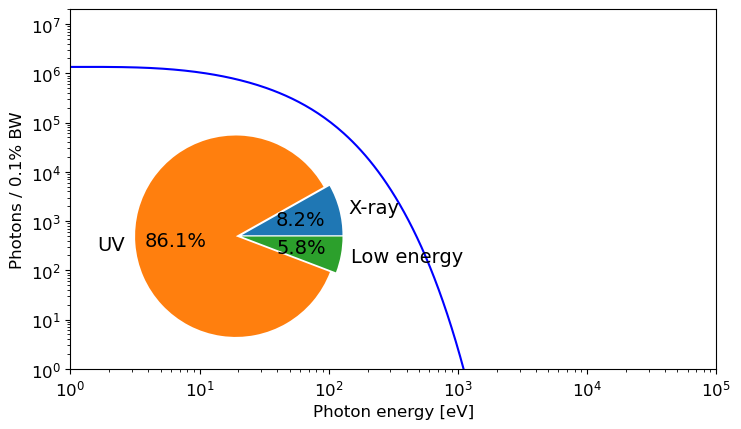

In [7]:
def plot_spectrum(Nphotons_Energy, Energy):
    fig,ax = plt.subplots(figsize=(8,5))
    fig.tight_layout(pad=4.) #set the spacing between subplots

    #n0 = 7e14*1e6  # /m3 maximum plasma density
    #wp = np.sqrt(n0*e**2/epsilon_0/m_e)
    #dist = phase/wp * c

    ax.loglog(Energy,Nphotons_Energy,c='b') # photon number ~ beta oscillations * number of electrons

    ax.set_xlabel('Photon energy [eV]', fontsize=fontsize)
    ax.set_ylabel('Photons / 0.1% BW', fontsize=fontsize)
    ax.tick_params(axis='both',labelsize=fontsize)
    ax.set_ylim(1,2e7)
    ax.set_xlim(1,1e5)

    ax.xaxis.set_major_locator(ticker.LogLocator(base=10, numticks=10))
    ax.yaxis.set_major_locator(ticker.LogLocator(base=10, numticks=10))
    locmin = ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=15)
    ax.xaxis.set_minor_locator(locmin)
    ax.xaxis.set_minor_formatter(ticker.NullFormatter())

    ax.yaxis.set_minor_locator(locmin)
    ax.yaxis.set_minor_formatter(ticker.NullFormatter())

    plt.savefig("spectrum.pdf", dpi=100, bbox_inches='tight')
    plt.savefig("spectrum.png", dpi=100, bbox_inches='tight')

    #/////////////////////
    # Add an inset plot in the upper-right corner
    inset_ax = inset_axes(ax, width="50%", height="70%", loc="lower left")

    x_initenergy = 124 #eV
    uv_initenergy = 3.1 #eV

    # Calculate all photons
    start_index = 0            # Start index for integration
    end_index = len(Energy)    # End index for integration
    all_photons = integrate_array_with_respect_to_array(Nphotons_Energy, Energy, start_index, end_index)
    all_photons_integrated = all_photons
 
    #print('ALL photons number: ', (all_photons))
    print('ALL photons number - INTEGRATED: ', "{0:.3E}".format(all_photons))

    for i in range(end_index):
        if Energy[i] >= uv_initenergy:
            uv_index = i
            break
    for i in range(end_index):
        if Energy[i] >= x_initenergy:
            x_index = i
            break
    low_photons = integrate_array_with_respect_to_array(Nphotons_Energy, Energy, start_index, uv_index)
    print('Low energy photons number (', "{0:.1f}".format(Energy[start_index]), '-', "{0:.1f}".format(Energy[uv_index-1]), ' eV): ', "{0:.1E}".format(low_photons))
 
    uv_photons = integrate_array_with_respect_to_array(Nphotons_Energy, Energy, uv_index, x_index-1)
    print('UV photons number (', "{0:.1f}".format(Energy[uv_index]), '-', "{0:.1f}".format(Energy[x_index-1]), ' eV): ', "{0:.1E}".format(uv_photons))

    x_photons = integrate_array_with_respect_to_array(Nphotons_Energy, Energy, x_index, end_index)
    print('X-ray photons number (', "{0:.1f}".format(Energy[x_index]), '-', "{0:.1f}".format(Energy[end_index-1]), ' eV): ', "{0:.1E}".format(x_photons))

    # PI Plot
    #fig.tight_layout(pad=2.) #set the spacing between subplots
    ##################################################
    Photons = np.array([])
    Photons = np.append(Photons, x_photons)
    Photons = np.append(Photons, uv_photons)
    Photons = np.append(Photons, low_photons)

    mylabels = ["X-ray", "UV", "Low energy"]
    myexplode = [0.03, 0.03, 0.03]

    inset_ax.pie(Photons, labels = mylabels, explode = myexplode, autopct='%1.1f%%', textprops={'fontsize': 14})
    #ax.text(0.9, 0.9, '(b)', transform=ax.transAxes, fontsize=fontsize14, verticalalignment='top')

    #inset_ax.set_title("Inset")
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])

plot_spectrum(Nphotons_Energy, Energy)

# statistics about portions of the spectrum

In [8]:
pkl_files

['/home/novac/Desktop/Projects/autorun_qv3d/simulation/v3d_synchrotron_00002.pkl',
 '/home/novac/Desktop/Projects/autorun_qv3d/simulation/v3d_synchrotron_00003.pkl',
 '/home/novac/Desktop/Projects/autorun_qv3d/simulation/v3d_synchrotron_00004.pkl',
 '/home/novac/Desktop/Projects/autorun_qv3d/simulation/v3d_synchrotron_00005.pkl',
 '/home/novac/Desktop/Projects/autorun_qv3d/simulation/v3d_synchrotron_00006.pkl',
 '/home/novac/Desktop/Projects/autorun_qv3d/simulation/v3d_synchrotron_00007.pkl',
 '/home/novac/Desktop/Projects/autorun_qv3d/simulation/v3d_synchrotron_00008.pkl',
 '/home/novac/Desktop/Projects/autorun_qv3d/simulation/v3d_synchrotron_00009.pkl',
 '/home/novac/Desktop/Projects/autorun_qv3d/simulation/v3d_synchrotron_00010.pkl',
 '/home/novac/Desktop/Projects/autorun_qv3d/simulation/v3d_synchrotron_00011.pkl']

In [9]:
def analyze_spectrum(Nphotons_Energy, Energy):
    
    x_initenergy = 124 #eV
    uv_initenergy = 3.1 #eV

    # Calculate all photons
    start_index = 0            # Start index for integration
    end_index = len(Energy)    # End index for integration
    all_photons = integrate_array_with_respect_to_array(Nphotons_Energy, Energy, start_index, end_index)
    all_photons_integrated = all_photons
 
    #print('ALL photons number: ', (all_photons))
    #print('ALL photons number - INTEGRATED: ', "{0:.3E}".format(all_photons))

    for i in range(end_index):
        if Energy[i] >= uv_initenergy:
            uv_index = i
            break
    for i in range(end_index):
        if Energy[i] >= x_initenergy:
            x_index = i
            break
    low_photons = integrate_array_with_respect_to_array(Nphotons_Energy, Energy, start_index, uv_index)
    #print('Low energy photons number (', "{0:.1f}".format(Energy[start_index]), '-', "{0:.1f}".format(Energy[uv_index-1]), ' eV): ', "{0:.1E}".format(low_photons))
 
    uv_photons = integrate_array_with_respect_to_array(Nphotons_Energy, Energy, uv_index, x_index-1)
    #print('UV photons number (', "{0:.1f}".format(Energy[uv_index]), '-', "{0:.1f}".format(Energy[x_index-1]), ' eV): ', "{0:.1E}".format(uv_photons))

    x_photons = integrate_array_with_respect_to_array(Nphotons_Energy, Energy, x_index, end_index)
    #print('X-ray photons number (', "{0:.1f}".format(Energy[x_index]), '-', "{0:.1f}".format(Energy[end_index-1]), ' eV): ', "{0:.1E}".format(x_photons))

    return all_photons, x_photons, uv_photons, low_photons

In [10]:
#all_photons, x_photons, uv_photons, low_photons = analyze_spectrum(Nphotons_Energy, Energy)

/tmp/ipykernel_50933/2155002551.py:20: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(array1_slice, array2_slice)


In [17]:
all_photons_meterly = []
x_photons_meterly = []
uv_photons_meterly = []
low_photons_meterly = []
positions_meterly = []
i = 0

for pklFile in pkl_files:
    i+=1
    #print(i, pklFile)
    
    
    # Load the pickle file
    # ####################
    with open(pklFile, "rb") as file:
        data = pickle.load(file)

    # print the keys
    # ##############
    #for key in data.keys():
    #    print(key)

    # Unpack dictionary keys into variables
    # #####################################    
    if isinstance(data, dict):
        criticalEnergy = data.get("criticalEnergy")
        Nphotons_Energy = data.get("Nphoton_Energy")
        Nphoton_Theta  = data.get("Nphoton_Theta")
        Nphoton_Phi    = data.get("Nphoton_Phi")
        Energy         = data.get("Energy")
        Theta          = data.get("Theta")
        Phi            = data.get("Phi")
        phase          = data.get("phase")
    
    all, X, uv, low = analyze_spectrum(Nphotons_Energy, Energy)
    
    all_photons_meterly.append(all)
    x_photons_meterly.append(X)
    uv_photons_meterly.append(uv)
    low_photons_meterly.append(low)
    positions_meterly.append(i)

# make numpy array
all_photons_meterly = np.array(all_photons_meterly)
x_photons_meterly = np.array(x_photons_meterly)
uv_photons_meterly = np.array(uv_photons_meterly)
low_photons_meterly = np.array(low_photons_meterly)
positions_meterly = np.array(positions_meterly)


/tmp/ipykernel_50933/2155002551.py:20: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(array1_slice, array2_slice)


### calculates photons at each metres

In [25]:
all_photons_eachmeter = np.zeros(len(positions_meterly))
x_photons_eachmeter = np.zeros(len(positions_meterly))
uv_photons_eachmeter = np.zeros(len(positions_meterly))
low_photons_eachmeter = np.zeros(len(positions_meterly))

for i in range( len(positions_meterly) ):
    #print(i)
    if i == 0:
        all_photons_eachmeter[i] = all_photons_meterly[i]
        x_photons_eachmeter[i] = x_photons_meterly[i]
        uv_photons_eachmeter[i] = uv_photons_meterly[i]
        low_photons_eachmeter[i] = low_photons_meterly[i]
    else:
        all_photons_eachmeter[i] = all_photons_meterly[i] - all_photons_meterly[i-1]
        x_photons_eachmeter[i] = x_photons_meterly[i] - x_photons_meterly[i-1]
        uv_photons_eachmeter[i] = uv_photons_meterly[i] - uv_photons_meterly[i-1]
        low_photons_eachmeter[i] = low_photons_meterly[i] - low_photons_meterly[i-1]
     
# calculate the percentage
percentage_all_photons_eachmeter = []
percentage_x_photons_eachmeter = []
percentage_uv_photons_eachmeter = []
percentage_low_photons_eachmeter = []

percentage_all_photons_eachmeter = all_photons_eachmeter / all_photons_meterly[-1] * 100
percentage_x_photons_eachmeter   = x_photons_eachmeter / x_photons_meterly[-1] * 100
percentage_uv_photons_eachmeter = uv_photons_eachmeter / uv_photons_meterly[-1] * 100
percentage_low_photons_eachmeter = low_photons_eachmeter / low_photons_meterly[-1] * 100

percentage_all_photons_eachmeter = np.array(percentage_all_photons_eachmeter)
percentage_x_photons_eachmeter = np.array(percentage_x_photons_eachmeter)
percentage_uv_photons_eachmeter = np.array(percentage_uv_photons_eachmeter)
percentage_low_photons_eachmeter = np.array(percentage_low_photons_eachmeter)
#sum(percentage_all_photons_eachmeter)

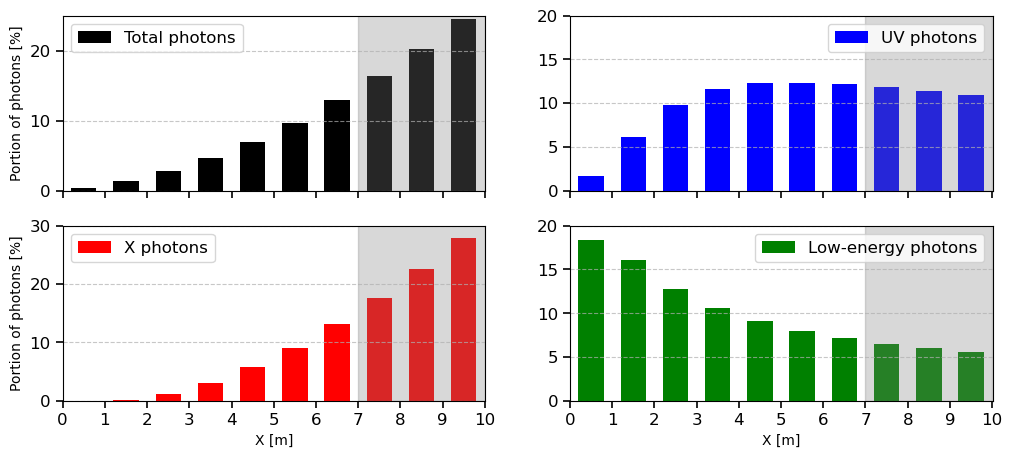

In [75]:
fig, axes = plt.subplots(2, 2, figsize=(12, 5), sharex=True)  # Side by side

#fig.tight_layout(pad=4.) #set the spacing between subplots
#########################
ax = axes[0, 0]
    
ax.set_xlim(0, 10.01)
ax.xaxis.set_ticks(np.arange(0., 10.1, 1))

ax.set_ylim(0, 25)
ax.yaxis.set_ticks(np.arange(0., 25.1, 10))

width = 0.6  # Bar width
#ax.scatter(selected_positions, x_percentage_along_accel, color='r', marker='o')
#ax.plot(selected_positions, x_percentage_along_accel,c='r', label = 'X-photon') # photon number ~ beta oscillations * number of electrons
ax.bar(positions_meterly - .5, percentage_all_photons_eachmeter, width, color='k', label = 'Total photons')
#ax.bar(positions_meterly- 2.5*width, percentage_x_photons_eachmeter, width, color='r', label = 'X photons')
#ax.bar(positions_meterly- 1.5*width, percentage_uv_photons_eachmeter, width, color='b', label = 'UV photons')


#ax.set_xlabel('X [m]')
ax.set_ylabel('Portion of photons [%]', fontsize = 10)

#################

ax.tick_params(axis='both',labelsize=fontsize)


ax.tick_params(which='both', width=1.2, labelsize=fontsize)  # Set fontsize to 12
ax.tick_params(which='major', length=5)
ax.tick_params(which='minor', length=2)

#################

ax.legend(fontsize=12)

#plt.axvline(x=8, color='blue', linestyle='--')
#plt.axvline(x=x2, color='red', linestyle='--', label='Line 2')

# Fill the area between the lines
ax.fill_betweenx(np.linspace(0, 40, 100), 7., 10, color='grey', alpha=0.3)

#ax.text(0.05, 0.85, 'About 75% of X-photons come from \nfinal acceleration i.e., between 7m-10m', transform=ax.transAxes, fontsize=10, va='top') # add label to subplots
ax.grid(axis='y', linestyle='--', alpha=0.7)

#########################
ax = axes[1, 0]
    
ax.set_xlim(0, 10.01)
ax.xaxis.set_ticks(np.arange(0., 10.1, 1))

ax.set_ylim(0, 30)
ax.yaxis.set_ticks(np.arange(0., 30.1, 10))

width = 0.6  # Bar width
#ax.scatter(selected_positions, x_percentage_along_accel, color='r', marker='o')
#ax.plot(selected_positions, x_percentage_along_accel,c='r', label = 'X-photon') # photon number ~ beta oscillations * number of electrons
#ax.bar(positions_meterly - .5, percentage_all_photons_eachmeter, width, color='k', label = 'Total photons')
ax.bar(positions_meterly- .5, percentage_x_photons_eachmeter, width, color='r', label = 'X photons')
#ax.bar(positions_meterly- 1.5*width, percentage_uv_photons_eachmeter, width, color='b', label = 'UV photons')


ax.set_xlabel('X [m]')
ax.set_ylabel('Portion of photons [%]', fontsize = 10)

#################

ax.tick_params(axis='both',labelsize=fontsize)


ax.tick_params(which='both', width=1.2, labelsize=fontsize)  # Set fontsize to 12
ax.tick_params(which='major', length=5)
ax.tick_params(which='minor', length=2)

#################

ax.legend(fontsize=12)

#plt.axvline(x=8, color='blue', linestyle='--')
#plt.axvline(x=x2, color='red', linestyle='--', label='Line 2')

# Fill the area between the lines
ax.fill_betweenx(np.linspace(0, 40, 100), 7., 10, color='grey', alpha=0.3)

#ax.text(0.05, 0.85, 'About 75% of X-photons come from \nfinal acceleration i.e., between 7m-10m', transform=ax.transAxes, fontsize=10, va='top') # add label to subplots
ax.grid(axis='y', linestyle='--', alpha=0.7)

#########################
ax = axes[0, 1]
    
ax.set_xlim(0, 10.01)
ax.xaxis.set_ticks(np.arange(0., 10.1, 1))

ax.set_ylim(0, 20)
ax.yaxis.set_ticks(np.arange(0., 20.1, 5))

width = 0.6  # Bar width
#ax.scatter(selected_positions, x_percentage_along_accel, color='r', marker='o')
#ax.plot(selected_positions, x_percentage_along_accel,c='r', label = 'X-photon') # photon number ~ beta oscillations * number of electrons
#ax.bar(positions_meterly - .5, percentage_all_photons_eachmeter, width, color='k', label = 'Total photons')
#ax.bar(positions_meterly- 2.5*width, percentage_x_photons_eachmeter, width, color='r', label = 'X photons')
ax.bar(positions_meterly- .5, percentage_uv_photons_eachmeter, width, color='b', label = 'UV photons')


#ax.set_xlabel('X [m]')
#ax.set_ylabel('Portion of photons [%]', fontsize = 10)

#################

ax.tick_params(axis='both',labelsize=fontsize)


ax.tick_params(which='both', width=1.2, labelsize=fontsize)  # Set fontsize to 12
ax.tick_params(which='major', length=5)
ax.tick_params(which='minor', length=2)

#################

ax.legend(fontsize=12)

#plt.axvline(x=8, color='blue', linestyle='--')
#plt.axvline(x=x2, color='red', linestyle='--', label='Line 2')

# Fill the area between the lines
ax.fill_betweenx(np.linspace(0, 40, 100), 7., 10, color='grey', alpha=0.3)

#ax.text(0.05, 0.85, 'About 75% of X-photons come from \nfinal acceleration i.e., between 7m-10m', transform=ax.transAxes, fontsize=10, va='top') # add label to subplots
ax.grid(axis='y', linestyle='--', alpha=0.7)

#########################
ax = axes[1, 1]
    
ax.set_xlim(0, 10.01)
ax.xaxis.set_ticks(np.arange(0., 10.1, 1))

ax.set_ylim(0, 20)
ax.yaxis.set_ticks(np.arange(0., 20.1, 5))

width = 0.6  # Bar width
#ax.scatter(selected_positions, x_percentage_along_accel, color='r', marker='o')
#ax.plot(selected_positions, x_percentage_along_accel,c='r', label = 'X-photon') # photon number ~ beta oscillations * number of electrons
ax.bar(positions_meterly - .5, percentage_low_photons_eachmeter, width, color='g', label = 'Low-energy photons')
#ax.bar(positions_meterly- 2.5*width, percentage_x_photons_eachmeter, width, color='r', label = 'X photons')
#ax.bar(positions_meterly- 1.5*width, percentage_uv_photons_eachmeter, width, color='b', label = 'UV photons')


ax.set_xlabel('X [m]')
#ax.set_ylabel('Portion of photons [%]', fontsize = 10)

#################

ax.tick_params(axis='both',labelsize=fontsize)


ax.tick_params(which='both', width=1.2, labelsize=fontsize)  # Set fontsize to 12
ax.tick_params(which='major', length=5)
ax.tick_params(which='minor', length=2)

#################

ax.legend(fontsize=12)

#plt.axvline(x=8, color='blue', linestyle='--')
#plt.axvline(x=x2, color='red', linestyle='--', label='Line 2')

# Fill the area between the lines
ax.fill_betweenx(np.linspace(0, 40, 100), 7., 10, color='grey', alpha=0.3)

#ax.text(0.05, 0.85, 'About 75% of X-photons come from \nfinal acceleration i.e., between 7m-10m', transform=ax.transAxes, fontsize=10, va='top') # add label to subplots
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig("awake-x-percentage.pdf", dpi=100, bbox_inches='tight')
plt.savefig("awake-x-percentage.png", dpi=100, bbox_inches='tight')